In [1]:
import os 
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import nltk.corpus 

data = pd.read_excel('../Text_Mining/all_texts.xlsx', header = None)


In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

data_tokenized = []
stop_words = set(stopwords.words('english')) 

for i in range(len(data)):
    data_token_temp = word_tokenize(data[0][i]) #for word in data[0] if not word in set(stopwords.words('english'))]
    data_tokenized.append(data_token_temp)
    
for i in range(len(data_tokenized)):
    for j in range(len(data_tokenized[i])):
        data_tokenized[i][j] = data_tokenized[i][j].lower()
        #data_tokenized[i][j] = stemmer.stem(data_tokenized[i][j])
        data_tokenized[i][j] = re.sub('[^a-z]', '', data_tokenized[i][j] )
        
        if (data_tokenized[i][j] in stop_words):
            data_tokenized[i][j] = ''
            data_tokenized[i].append(data_tokenized[i][j])
        

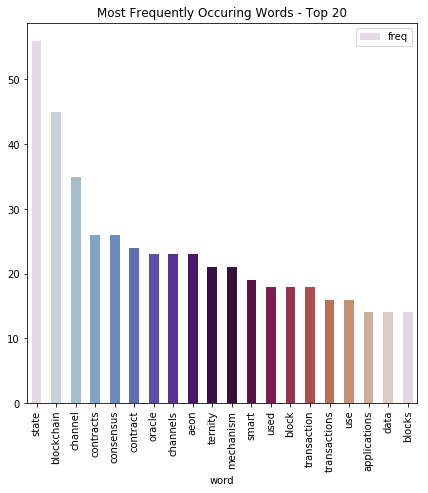

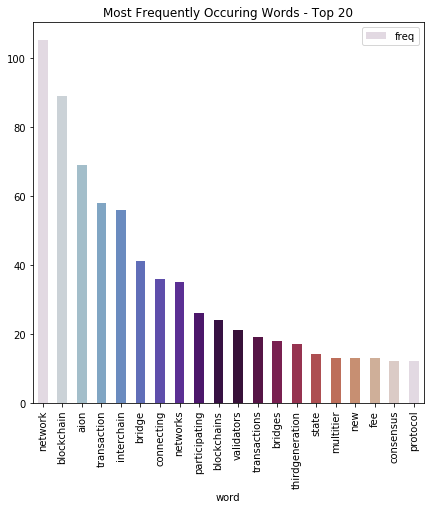

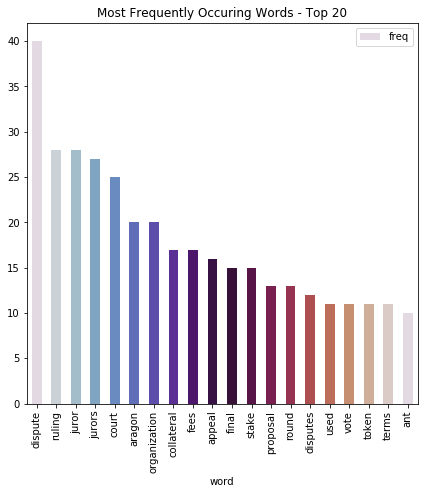

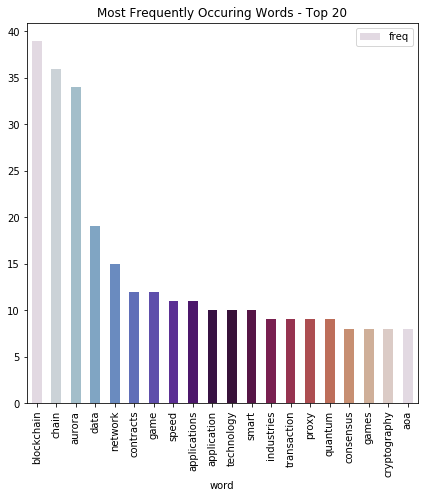

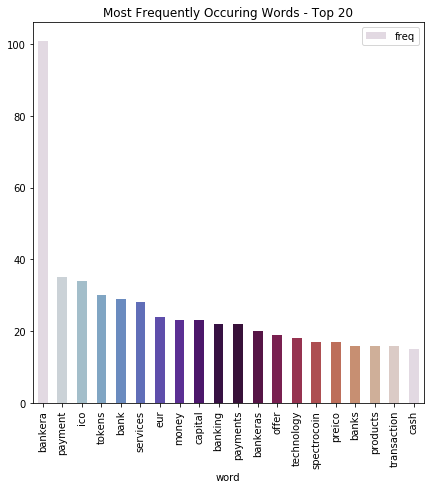

In [3]:

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
for i in range(0, 5):
    words = cv.fit_transform(data_tokenized[i])#quotes_bigrams[i])#
    sum_words = words.sum(axis=0)


    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    #fy = frequency.head(20)
    #print (fy)
    color = plt.cm.twilight(np.linspace(0, 1, 20))
    frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(7, 7), color = color)
    plt.title("Most Frequently Occuring Words - Top 20")


In [4]:
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

for i in range(len(data_tokenized)):
    data_tokenized[i] = ' '.join(data_tokenized[i])  
#print(data_tokenized)

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data_tokenized)  

#print("Shape of X :", X)

Shape of X :   (0, 1000)	0.007081925296215896
  (0, 77)	0.0046142507621329005
  (0, 1622)	0.008684060679313842
  (0, 1444)	0.007789720624879788
  (0, 671)	0.004178495897930328
  (0, 94)	0.009043210693512122
  (0, 1966)	0.006680429739135597
  (0, 1048)	0.006587032873077751
  (0, 560)	0.012788129903617057
  (0, 1288)	0.005174322462956046
  (0, 1874)	0.006776457846053991
  (0, 1196)	0.004178495897930328
  (0, 109)	0.008359169972237835
  (0, 426)	0.006154965161604159
  (0, 999)	0.008359169972237835
  (0, 1384)	0.0047191443418393726
  (0, 937)	0.007417485096087977
  (0, 329)	0.005426939670503263
  (0, 1324)	0.010721950926614359
  (0, 1546)	0.0068752697606939365
  (0, 739)	0.009664703377961955
  (0, 69)	0.008858907843761987
  (0, 1055)	0.008684060679313842
  (0, 1514)	0.008684060679313842
  (0, 863)	0.01932940675592391
  :	:
  (92, 1907)	0.011454004800859877
  (92, 1855)	0.007389161528835378
  (92, 1837)	0.0747363512980432
  (92, 896)	0.004932480194855316
  (92, 930)	0.007916333910036474
  (

In [5]:
from sklearn.cluster import KMeans

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 bankera
 eur
 preico
 ico
 bank
 banking
 payment
 money
 capital
 cards
Cluster 1:
 blockchain
 network
 data
 chain
 nodes
 consensus
 transaction
 protocol
 users
 block
Cluster 2:
 platform
 token
 asset
 digital
 tokens
 dai
 market
 trading
 blockchain
 assets
Cluster 3:
 https
 mixin
 kernel
 domain
 mixinone
 draft
 xin
 contact
 snapshot
 july
Cluster 4:
 crypto
 cryptocom
 cryptocurrency
 gold
 pundi
 swipe
 market
 crypterium
 token
 stasis
